# Atividade Prática 6 

## Análise dinâmica de sinais

#### Nome: Diogo José Costa Alves N° USP: 13709881

###  Sinais com conteúdo espectral variante no tempo

Todos os sinais no mundo real possuem conteúdo espectral que varia com o tempo: eventos começam e terminam, componentes senoidais que estavam presentes num certo momento já não estão presentes em outro, ou estão presentes com intensidade menor.

Em oposição a essa visão *dinâmica* do conteúdo dos sinais, a análise de Fourier em $\mathbb{C}^N$ parte de coleções de formas básicas de onda $\{E_k\}$ com frequências fixas $k=0,\ldots,N-1$, que para cada sinal $x$ analisado são associadas a coeficientes $X_k$ que são *estáticos*, visto que multiplicam "globalmente" o sinal temporal $E_k$.

Uma maneira de tornar a análise de Fourier mais "dinâmica" consiste em analisar segmentos curtos de um sinal "longo" $x\in\mathbb{C}^N$, tomando-se $M\ll N$ amostras de cada vez. Essa abordagem segmentada já apareceu no capítulo 3 e na atividade prática 4, tanto em sinais unidimensionais quanto bidimensionais (onde os segmentos eram chamados de "blocos" no esquema de compressão JPEG).

Usando dois parâmetros, $M>0$ (duração em amostras) e $m>0$ (amostra inicial), podemos determinar um segmento do sinal $x$ como

$$\tilde{x} = \left(x_{m},x_{m+1},\ldots,x_{m+M-1}\right)\in\mathbb{C}^M,$$

e assim considerar sua DFT $\tilde{X}\in\mathbb{C}^M$ para efeito de caracterização do conteúdo espectral de $x$ no recorte $[m,m+M)$.

Lembre-se que o número de amostras $M$ determina tanto a duração do sinal (de $\Delta_t=\frac{M}{R}$ segundos se $R$ é a taxa de amostragem) quanto a resolução em frequência (pois os bins da DFT são separados por $\Delta_f=\frac{R}{M}$ Hz).

Assim, numa análise segmentada, deseja-se usar segmentos de duração $\Delta_t$ razoavelmente curta para evitar que o caráter "estático" das formas básicas de onda de Fourier seja um empecilho, e suficientemente longos a fim de garantir uma resolução em frequência $\Delta_f$ adequada.

Esses dois critérios antagônicos estão na origem de uma questão crucial em análise de sinais que é frequentemente chamada de *Princípio da Incerteza*, por uma alusão metafórica ao princípio de Heisenberg em Física Quântica: não é possível localizar de forma perfeita uma componente do sinal simultaneamente nos domínios temporal e espectral:

- quanto melhor a localização temporal (menor $M$), maior a imprecisão espectral ($R/M$), e 

- quanto melhor a precisão espectral (menor $R/M$), pior a localização temporal (maisr $M$).

Em outros termos, a precisão temporal $\Delta_t=\frac{M}{R}$ e a resolução espectral $\Delta_f=\frac{R}{M}$ satisfazem a condição invariante $\Delta_t\Delta_f=1$.

### Exemplo: varredura senoidal

Na célula abaixo está construído um sinal, amostrado a $R=44100$ Hz, com uma varredura senoidal definida pela expressão

$$x(t) = \sin(2\pi f(t)t),\quad t\in[0,D)$$

onde $D=10$ segundos e $f(t)$ é uma função linear que vai de $0$ até $1000$ no intervalo $t\in[0,D)$. O espectro de magnitude desse sinal aparece em seguida, evidenciando o problema da falta de localização da DFT: várias frequências compõem o sinal, mas não se sabe em que trecho do sinal elas aparecem ou desaparecem.

In [1]:
# importa dependências
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from IPython.display import Audio
from ipywidgets import IntSlider, interactive, VBox, HBox

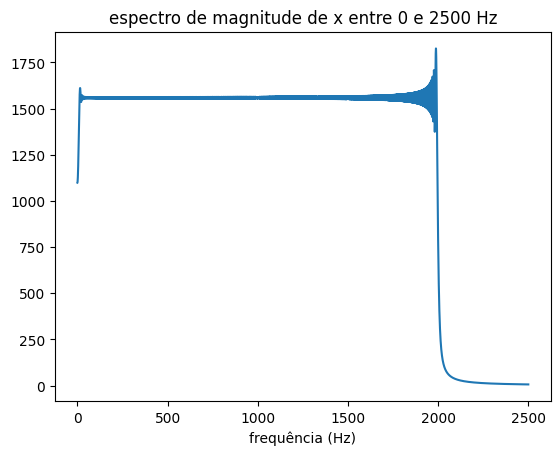

In [2]:
R = 44100 # taxa de amostragem em Hz
D = 10 # duração em segundos
t = np.arange(0,D,1/R) # linha do tempo de 0 a D segundos

f = t*100 # função f(t)

x = np.sin(2*m.pi*f*t) # sinal x(t)

X = fft(x) # espectro de x

k0 = int(len(X)*2500/R) # índice correspondente a 2500 Hz

plt.plot(np.arange(k0)*R/len(X),abs(X[0:k0]))

plt.xlabel("frequência (Hz)")
plt.title(r"espectro de magnitude de x entre 0 e 2500 Hz")

Audio(x.T, rate=R) # elemento interativo para ouvir a varredura senoidal

**Exercício 1 (cont.):**

Adapte o código fornecido do exemplo interativo abaixo para representar o **espectro de magnitude**, sempre no intervalo de frequências de $0$ Hz a $2500$ Hz, do segmento do sinal $x$ definido pelos parâmetros interativos $m\in\{0,1000,2000,\ldots\}$ e $M\in\{100,200,300,\ldots,10000\}$. Experimente a interface com alguns valores de $m$ e $M$, e em seguida responda de forma sucinta as perguntas contidas na caixa de texto após o código.

**Dica:** *Cuidado com o último segmento, para garantir que $m+M-1$ ainda é um índice válido. Um exemplo de espectro no formato esperado é <img src="http://www.ime.usp.br/~mqz/dsp/espectro.png" alt="espectro" width="400"/>*

In [3]:
# Resposta do exercício 1

def exercicio1():
    # plota o gráfico x(t) no intervalo [a,a+b] (índices de amostras)
    def iplot(a,b):
        if a+b-1 > len(x): return # apenas para não quebrar
        
        x_til = x[a:a+b]
        X_til = fft(x_til)
        
        k0 = int(len(X_til)*2500/R) # índice correspondente a 2500 Hz

        plt.plot(np.arange(k0)*R/len(X_til),abs(X_til[0:k0]))
        
        
        
        t_inicial = a*D/len(x)
        t_final = (a+b)*D/len(x)
        plt.xlabel("frequência (Hz)")
        #plt.title(r"espectro de x em $t \in $ [{:.2f},{:.2f}], len(X_til)={}".format(t_inicial,t_final, len(X_til)))
        plt.title(r"espectro de x em $t \in $ [{:.2f},{:.2f}], max(abs(X_til))={:.2f}".format(t_inicial,t_final, max(abs(X_til))))
        plt.show()

    #ultimo_a = 441000 - b -1
    a = IntSlider(min=0, max=len(x), step=1000, value=111132, continuous_update=False, description=r'$m$')
    b = IntSlider(min=100, max=10000, step=100, value=900, continuous_update=False, description=r'$M$')
    w = interactive(iplot, a=a, b=b)
    display(HBox([w.children[2],VBox([w.children[0],w.children[1]])]))
    w.update()

exercicio1()

#### Resposta do exercício 1 (cont)

#### 1. qual é o perfil típico de cada espectro?
R: O perfil típico de cada espectro é o de um único pico de frequência. A resolução do espectro é relacionada à largura do recorte(M).


#### 2. qual é o comportamento aparente em função de $m$ para um $M$ fixado (tome por exemplo $M$=1000), e em particular quais são as frequências mínima e máxima dos picos espectrais observados?
R: O comportamento aparente em uma varredura do $m$, fixando o $M=1000$, é de uma variação crescente do pico de frequência detectado.
A magnitude do sinal começa é em 106,73 quando m=0, 796,73 quando m=2, e depois a magnitude fica mais ou menos estável entre (300,500).

Aparentemente o pico de frequência varia de mínimo de Hz quando m=0, até um máximo próximo de 2000Hz nos últimos valores de m.


### 3. qual é o comportamento aparente em função de $M$ para um $m$ fixado (tome por exemplo $m$=200000)?
R: O comportamento aparente para uma varredura do $M$, fixando o $m=200000$ é uma variação crescente na resolução do espectro de frequência.

A magnitude do pico de frequência detectado varia de forma crescente, conforme a largura do segmento $M$.


Além disso conforme a resolução do espectro de frequência vai aumentando, aumentando o $M$, percebemos um aumento na definição/exatidão do pico detectado.



### Espectrogramas

Uma forma conveniente de organizar os espectros de todos os segmentos $M$-dimensionais de um mesmo sinal $x\in\mathbb{C}^N$ é na forma de uma matriz $\mathcal{X}\in\mathcal{M}_{M\times L}(\mathbb{C})$, onde $L$ é o número de segmentos, e a coluna $m$ contém a DFT de $\tilde{x} = \left(x_{m},x_{m+1},\ldots,x_{m+M-1}\right)\in\mathbb{C}^M$.

Em particular, a matriz $|\mathcal{X}|$ dos valores absolutos com as linhas dispostas ascendentemente de $0$ até $\frac{M}{2}$ (componente de Nyquist) é chamada de *Espectrograma* de $x$. Nessa *imagem*, o tempo é lido na horizontal, a frequência na vertical, e os pixels $(k,m)$ de maior intensidade correspondem às componentes de frequência $k$ ativas no segmento $m$ do sinal.

**Exercício 2:** adapte o código do gráfico interativo para construir um espectrograma do sinal $x$ em função de um parâmetro interativo $M\in\{100,200,300,\ldots,10000\}$, considerando as frequências entre $0$ e $2500$ Hz. Considere que os segmentos são justapostos, começando nas amostras $m=0,M,2M,3M,\ldots$. Comente de forma sucinta na caixa de texto após o código suas observações em relação à visualização oferecida pelo espectrograma para a variação de frequência instantânea do sinal $x$, considerando distintos valores de $M$, e comparando suas observações com aquelas do exercício 1.

**Dica:** *construa o espectrograma fazendo o append de linhas, e coloque o resultado no formato convencional usando <tt>np.rot90</tt>; além disso, use a opção <tt>aspect='auto'</tt> da função <tt>plt.imshow</tt> para preservar um tamanho fixo do espectrograma para todos os valores de $M$. Um exemplo de espectrograma no formato esperado é <img src="http://www.ime.usp.br/~mqz/dsp/espectrograma.png" alt="espectro" width="400"/>*

In [4]:
# Resposta do Exercício 2

def exercicio2():
    # plota o gráfico x(t) no intervalo [a,a+b] (índices de amostras)
    def iplot(M):
        N = len(x)
        rows = []
        
        k0 = int(M*2500/R) # índice correspondente a 2500 Hz
        
        for m in range(0,N-M,M):
            x_til = x[m:m+M]
            X_til = fft(x_til)
            
            rows.append(abs(X_til[0:k0]))
            
        rows_rot90 = np.rot90(rows)
        plt.imshow(rows_rot90, aspect='auto', extent=[0, 10, 0, 2500])

        plt.xlabel("tempo em segundos")
        plt.ylabel("frequência em Hz")
        plt.title(f'espectograma com M={M}')


    #ultimo_a = 441000 - b -1
    M = IntSlider(min=100, max=10000, step=100, value=1000, continuous_update=False, description=r'$M$')
    w = interactive(iplot, M=M)
    display(HBox([w.children[1],w.children[0]]))
    w.update()

exercicio2()

#### Resposta do exercício 2 (cont)

Comente de forma sucinta na caixa de texto após o código suas observações em relação à visualização oferecida pelo espectrograma para a variação de frequência instantânea do sinal 𝑥, considerando distintos valores de 𝑀, e comparando suas observações com aquelas do exercício 1.

**Comentários e observações:**

R: A visualização do espectograma é uma forma mais conveniente para visualizar o sinal de frequência. Permite não apenas detectar a frequência mas também perceber em que momento ela estava ativa ou não.

Assim como no exercício 1, a variação do tamanho do segmento $M$ afeta a resolução do espectro de frequência. 
Da mesma forma que no exercício 1, quanto maior o segmento $M$ maior a resolução do espectro, podemos perceber o mesmo efeito no desenho do espectograma.



### Frequência instantânea

Afinal como se estima a frequência instantânea de um sinal senoidal de frequência variável?

E porque a expressão 

$$x(t) = \sin(2\pi f(t)t),\quad t\in[0,D)$$

com $f(t)$ indo de $0$ até $1000$ produz frequências instantâneas de até $2000$ Hz?

Uma maneira de conceituar a frequência instantânea de um sinal senoidal é considerá-lo como projeção de um movimento circular uniforme: por exemplo, a função complexa $g(t)=e^{i2\pi ft}$ possui como projeção horizontal (eixo real) a função $g_1(t)=\Re[g(t)]=\cos(2\pi ft)$ e como projeção vertical a função $g_2(t)=\Im[g(t)]=\sin(2\pi ft)$.

Nas duas projeções, a *velocidade de giro* é de $\omega=2\pi f$ radianos/segundo, ou $f=\frac{\omega}{2\pi}$ Hz, que correspondem ao ângulo ou fase (em radianos ou ciclos) percorrido num intervalo de 1 segundo. 

Em outras palavras, a frequência (angular) instantânea do sinal $x(t)$ corresponde à variação de fase
$$\tilde{\omega} = \frac{\varphi_2-\varphi_1}{t_2-t_1} = \frac{2\pi f(t_2)t_2-2\pi f(t_1)t_1}{t_2-t_1}.$$
para dois instantes sucessivos $t_1$ e $t_2$ bem próximos (no limite, estaríamos falando da *derivada* da fase instantânea).

Num sinal digital amostrado a $R$ Hz, essa estimativa de frequência instantânea pode ser feita a cada amostra, considerando-se a expressão acima para dois instantes amostrais sucessivos $t_1$ e $t_2 = t_1+\frac{1}{R}$.

A estimativa $\tilde{\omega}$ estará em radianos/segundo, mas pode ser convertida facilmente para Hz usando a expressão $\tilde{f} = \frac{\tilde{\omega}}{2\pi}$.

**Exercício 3:** Escreva um código que calcule os valores da frequência instantânea em Hz $\tilde{f}(t)$ no intervalo $t\in[0,10)$, a partir da expressão da $f(t)$ usada no exercício 1, e plote em um mesmo gráfico as funções $f(t)$ e $\tilde{f}(t)$. Comente após o código: seu gráfico corrobora as observações dos exercícios 1 e 2?

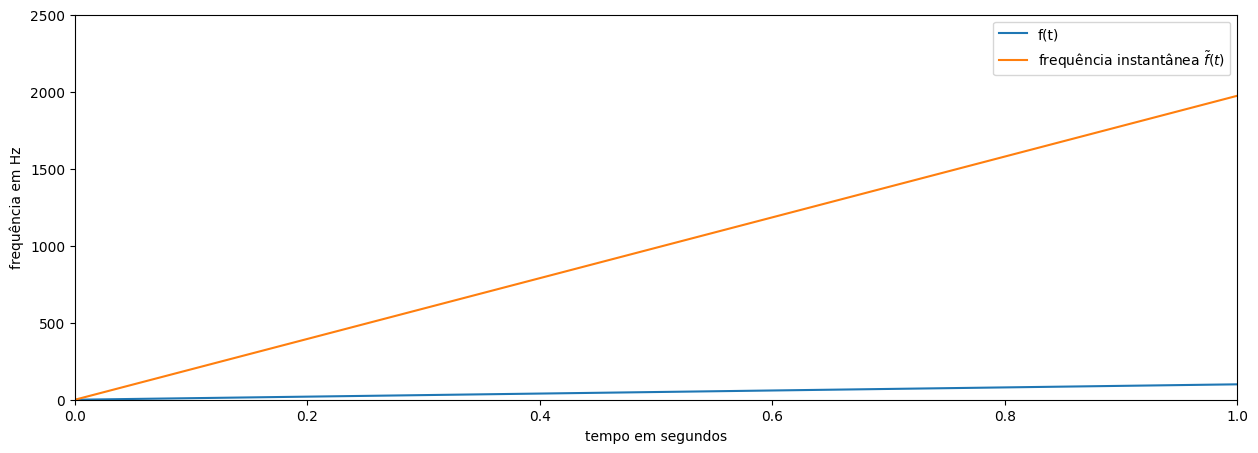

In [5]:
import math

def exercicio3(f):
    omegatil = np.zeros(len(f))

    for i in range(len(f)-1):
        t1 = t[i]
        t2 = t[i+1]
        ft1 = f[i]
        ft2 = f[i+1]
        omegatil[i] = ((2 * math.pi * ft2 * t2) - (2 * math.pi * ft1 * t1)) / (t2 - t1)

    # convertendo para Hz
    ftil = omegatil / 2*math.pi

    plt.figure(figsize=(15,5));
    plt.plot(t,f, label=r'f(t)')

    plt.plot(t,ftil, label=r"frequência instantânea $\tilde{f}(t)$");
    plt.xlabel('tempo em segundos')
    plt.ylabel('frequência em Hz')
    plt.axis([0, 1, 0, 2500]);
    plt.legend()
    plt.show()

exercicio3(f)

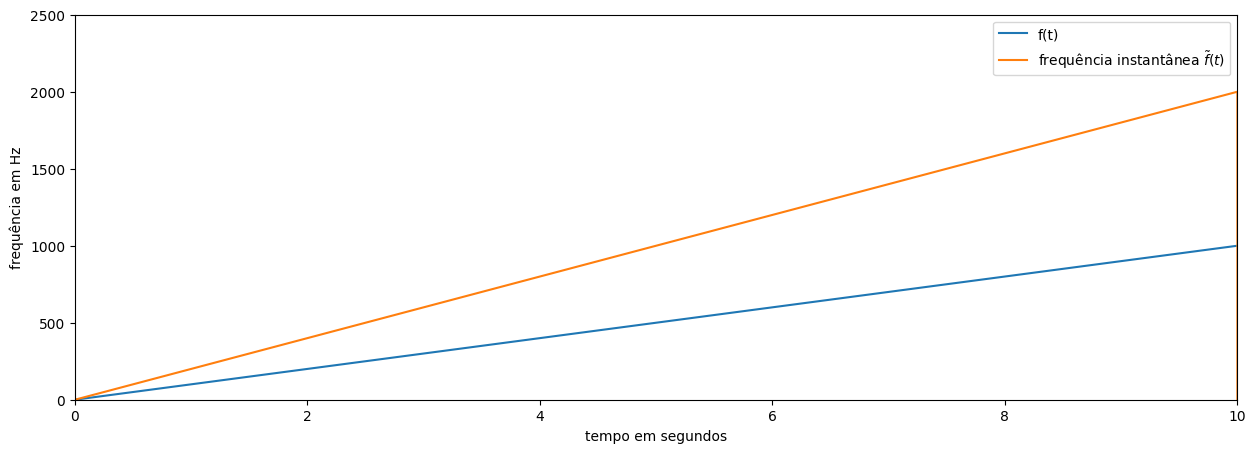

In [6]:
import math

def exercicio3_2(f):
    omegatil = np.zeros(len(f))

    for i in range(len(f)-1):
        t1 = t[i]
        t2 = t[i+1]
        ft1 = f[i]
        ft2 = f[i+1]
        omegatil[i] = ((2 * math.pi * ft2 * t2) - (2 * math.pi * ft1 * t1)) / (t2 - t1)

    # convertendo para Hz
    ftil = omegatil / (2*math.pi)

    plt.figure(figsize=(15,5));
    plt.plot(t,f, label=r'f(t)')

    plt.plot(t,ftil, label=r"frequência instantânea $\tilde{f}(t)$");
    plt.xlabel('tempo em segundos')
    plt.ylabel('frequência em Hz')
    plt.axis([0, 10, 0, 2500]);
    plt.legend()
    plt.show()

exercicio3_2(f)

In [8]:
len(t)

441000

**Resposta do exercício 3 (cont)**

**Comente:** Seu gráfico corrobora as observações dos exercícios 1 e 2?

Assim como no exercício 1, percebemos a variação crescente no pico de frequência detectado, quando fixamos $M$ e varremos $m$.

Assim como no exercício 2, percebemos uma linha com inclinação positiva no gráfico do espectograma.

A curva $\tilde{f}$ apresenta uma variação positiva na frequência instantânea.

Os intervalos de valores da curva $\tilde{f}$ é visualmente compatível com o gráfico do espectograma e corrobora as observações dos exercícios 1 e 2.
